C:\Users\wjdru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9901418610242847


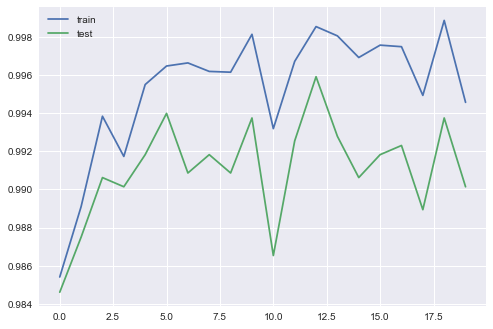

C:\Users\wjdru\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


0.23611445058908392


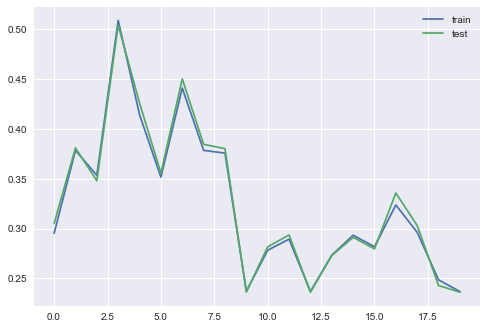

In [22]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_df = pd.read_csv('mnist_train_final.csv')
test_df = pd.read_csv('mnist_test_final.csv')

#1, 2, 3, 4 클래스 데이터만 추출하여 사용
train_df = train_df[(train_df['label']==1) | (train_df['label']==2) | (train_df['label']==3) | (train_df['label']==4)]
test_df = test_df[(test_df['label']==1) | (test_df['label']==2) | (test_df['label']==3) | (test_df['label']==4)]

train_labels = train_df['label']
test_labels = test_df['label']

train_data = train_df.loc[:, train_df.columns != 'label']
test_data = test_df.loc[:, test_df.columns != 'label']

#정규화 진행
train_data /= 255
test_data /= 255

train = []
test = []

#learning_rate_init 가 0.01일 때
mlp = MLPClassifier(solver='adam', learning_rate_init=0.01, max_iter = 1, 
                    hidden_layer_sizes=[200, 100], warm_start=True)
for i in range(20):
    mlp.fit(train_data, train_labels)
    #print(mlp.score(test_data, test_labels))
    train.insert(i, mlp.score(train_data, train_labels))
    test.insert(i, mlp.score(test_data, test_labels))
#print(mlp.score(test_data, test_labels))

#plt.subplot(1,2,1)
plt.style.use('seaborn')
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.ylabel('', fontsize = 14)
plt.xlabel('', fontsize = 14)
plt.title('', fontsize = 18)
plt.legend(loc="best")
plt.show()

train = []
test = []

#learning_rate_init 가 1일 때
mlp = MLPClassifier(solver='adam', learning_rate_init=1, max_iter = 1, 
                    hidden_layer_sizes=[200, 100], warm_start=True)
for _ in range(20):
    mlp.fit(train_data, train_labels)
    #print(mlp.score(test_data, test_labels))
    train.insert(i, mlp.score(train_data, train_labels))
    test.insert(i, mlp.score(test_data, test_labels))
#print(mlp.score(test_data, test_labels))

#plt.subplot(1,2,2)
plt.style.use('seaborn')
plt.plot(train, label = 'train')
plt.plot(test, label = 'test')
plt.ylabel('', fontsize = 14)
plt.xlabel('', fontsize = 14)
plt.title('', fontsize = 18)
plt.legend(loc="best")
plt.show()

